# Part I - Investigating the Relationships between Variables in the Prosper Loan Data
## by Zadock Mainda

## Introduction

This dataset describes 81 variables for 113,937 loans taken at a credit facility between Nov 2005 and Mar 2014. Since it will be impossible to investigate each of these 81 variables in this project, we are going to curate a short list of variables to investigate how various borrowers attributesinteract with each other. A detailed definition of these variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) 



## Preliminary Wrangling


In [795]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

In [796]:
#Read dataset into a df using pandas 

LoanData = pd.read_csv('prosperLoanData.csv')

#### Structure of the dataset

Let's retrieve a sample of 5 rows so that we can have a broad overview of the dataframe

In [797]:
LoanData.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
36509,03EA35335700554889361B0,545929,2011-12-21 05:04:36.947000000,NaN,36,Current,NaN,0.24983,0.2121,0.2021,...,-46.24,0.0,0.0,0.0,0.0,1.0,0,0,0.0,13
93456,B12334290235396512FA71F,378299,2008-08-05 13:52:00.063000000,A,36,Completed,2011-08-18 00:00:00,0.19351,0.1789,0.1689,...,-168.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,181
54863,C4593390828796080B2AA44,142980,2007-05-25 17:07:18.390000000,C,36,Completed,2010-06-16 00:00:00,0.17722,0.1700,0.1600,...,-58.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
27532,3514358847991633987973E,892327,2013-09-09 14:06:18.307000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-7.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
88598,AC913581222763893AF2627,800596,2013-06-06 18:13:43.877000000,NaN,36,Current,NaN,0.27285,0.2346,0.2246,...,-24.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [798]:
# dataframe dimensions

LoanData.shape

(113937, 81)

According to the shape attribute, this dataframe is made up of 113,937 rows and 81 columns.

### The main features of interest in this dataset are listed below:

We are going to use the subset of columns below to investigate how various borrowers' attributes interact with each other. 

In [799]:
selectedCols = [
    'ListingKey', 'ListingCreationDate','CreditGrade', 
    'LoanStatus', 'BorrowerRate', 'ProsperScore', 
    'EmploymentStatus', 'EmploymentStatusDuration', 
    'IsBorrowerHomeowner',
    'PublicRecordsLast10Years', 'DebtToIncomeRatio', 'IncomeRange', 
    'LoanOriginalAmount', 'MonthlyLoanPayment'
     ] 

Create a new dataframe that comprises only of the columns indicated above: 

In [800]:
loan_new = LoanData[selectedCols]

## Assessing Data

### Quality issues


1. ListingCreationDate is a string 
2. Duplicate descriptor in the Employment status *('Employed' & 'Full-time' )*
3. IncomeRange is a string instead of Categorical datatype
4. CreditGrade is a String object 


In [801]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   ListingCreationDate       113937 non-null  object 
 2   CreditGrade               28953 non-null   object 
 3   LoanStatus                113937 non-null  object 
 4   BorrowerRate              113937 non-null  float64
 5   ProsperScore              84853 non-null   float64
 6   EmploymentStatus          111682 non-null  object 
 7   EmploymentStatusDuration  106312 non-null  float64
 8   IsBorrowerHomeowner       113937 non-null  bool   
 9   PublicRecordsLast10Years  113240 non-null  float64
 10  DebtToIncomeRatio         105383 non-null  float64
 11  IncomeRange               113937 non-null  object 
 12  LoanOriginalAmount        113937 non-null  int64  
 13  MonthlyLoanPayment        113937 non-null  f

In [802]:
# Retrieve summary stats and check for outliers

loan_new.describe()

,BorrowerRate,ProsperScore,EmploymentStatusDuration,PublicRecordsLast10Years,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,84853.000000,106312.000000,113240.000000,105383.000000,113937.00000,113937.000000
mean,0.192764,5.950067,96.071582,0.312646,0.275947,8337.01385,272.475783
std,0.074818,2.376501,94.480605,0.727868,0.551759,6245.80058,192.697812
min,0.000000,1.000000,0.000000,0.000000,0.000000,1000.00000,0.000000
25%,0.134000,4.000000,26.000000,0.000000,0.140000,4000.00000,131.620000
50%,0.184000,6.000000,67.000000,0.000000,0.220000,6500.00000,217.740000
75%,0.250000,8.000000,137.000000,0.000000,0.320000,12000.00000,371.580000
max,0.497500,11.000000,755.000000,38.000000,10.010000,35000.00000,2251.510000


Check for duplicated rows in the dataframe

In [803]:
#Check for duplicates

loan_new.duplicated().sum()

0

There are no duplicates in the LoanData datframe

Create a custom function that returns unique items in a column. This will assist with reducing repetitive code while at the same time giving us a glimpse of how the specified columns are populated. 

In [804]:
# dataframe name (loan_new) is hardcoded in the function:
# Takes column name as param 
# returns unique in indicated column

def entries(columnName):
    #param: name of column
    global loan_new
    df = loan_new
    return df[columnName].unique()

In [805]:
#List unique entries in the LoanStatus column

entries('LoanStatus')

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [806]:
#List unique entries in the EmploymentStatus column

entries('EmploymentStatus')

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [807]:
#List unique entries in the IsBorrowerHomeowner column

entries('IsBorrowerHomeowner')

array([ True, False])

In [808]:
#List unique entries in the IncomeRange column

entries('IncomeRange')

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [809]:
#List unique entries in the IncomeRange column

entries('CreditGrade')

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

###### Make copies of the original data

In [810]:
loan_clean = loan_new.copy()

## Cleaning

### Issue #1: ListingCreationDate is a string instead of datetime object 

#### Define:
* Change the datatype of ListingCreationDate from string to Datetime

#### Code

In [811]:
#Change datatype to Datetime from string

loan_clean['ListingCreationDate']= pd.to_datetime(loan_clean['ListingCreationDate'])

#### Test

In [812]:
#Confirm that ListingCreationDate is of datetime datatype

assert loan_clean['ListingCreationDate'].dtype == 'datetime64[ns]'

### Issue #2: Duplicate descriptor in the Employment status ('Employed' & 'Full-time' )

#### Define
* Rename *Full-time* status to *Employed*

#### Code 

In [813]:
loan_clean.loc[(loan_clean.EmploymentStatus == 'Full-time' ), 'EmploymentStatus'] = 'Employed'

#### Test

In [814]:
#Confirm that Full-time is not in the EmploymentStatus column

assert 'Full-time' not in loan_clean.EmploymentStatus.unique()

## Issue #3: IncomeRange is a string

#### Define
* Change IncomeRange from String to Categorical datatype

#### Code
Let's confirm the IncomeRange's datatype

In [815]:
loan_clean.IncomeRange.dtype

dtype('O')

next step is retrieving a list of unique objects from the column

In [816]:
loan_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

Since we are going to use these ranges to categorize some of our operations, we are going to assume that each occurence of `Not displayed` and `Not employed` in the column implies that the loan applicant did not have a source of income therefore will be categorized under `'$0'`

In [817]:
# loc: select rows based on multiple conditions
# select rows with 'Not Employed' or 'Not displayed'
# change values to '$0'

loan_clean.loc[(loan_clean.IncomeRange == 'Not employed') | (loan_clean.IncomeRange == 'Not displayed'), 'IncomeRange'] = '$0'

In [818]:
# list unique items in the IncomeRange column

loan_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', '$0', '$100,000+',
       '$75,000-99,999', '$1-24,999'], dtype=object)

We will order the income ranges from smallest to largest

In [819]:
# income ranges in a list 

ordered_ranges = [
                  '$0',
                  '$1-24,999',
                  '$25,000-49,999',
                  '$50,000-74,999',
                  '$75,000-99,999',
                  '$100,000+'
                 ]

Next wee will change the column's  datatype

In [820]:
#categorical method takes in a list-like of values and sorted categories list

loan_clean['IncomeRange'] = pd.Categorical(loan_clean['IncomeRange'], ordered_ranges, ordered=True)

confirm if indeed unique from the IncomeRange column are sorted per our ordered_ranges list

In [821]:
# Select unique items from IncomeRange column and sort them

loan_clean['IncomeRange'].unique().sort_values()

['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
Categories (6, object): ['$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

As we can see from the above, income ranges are sorted

In [822]:
loan_clean['IncomeRange'].dtype

CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                  '$75,000-99,999', '$100,000+'],
, ordered=True)

#### Test

In [823]:
#confirm that datatype is category

assert loan_clean['IncomeRange'].dtype == 'category'

## Issue #4: CreditGrade is a String object

#### Define
* Change datatype to categorical 

#### Code

In [824]:
#Unique entries in the CreditGrade column

loan_clean['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

We will sort the credit ratings manually from the highest to the lowest credit rating.

In [825]:
# temp list to hold ordered items

sorted_credits = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

In [826]:
# change datatype to category

loan_clean['CreditGrade'] = pd.Categorical(loan_clean['CreditGrade'], sorted_credits, ordered=True)

In [827]:
#Confirm the sorting order of entries in the CreditGrade column

loan_clean['CreditGrade'].unique().sort_values()

['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', NaN]
Categories (8, object): ['AA' < 'A' < 'B' < 'C' < 'D' < 'E' < 'HR' < 'NC']

#### Test

In [828]:
#assert data type is category

assert loan_clean['CreditGrade'].dtype == 'category'

###### Save clean dataset to CSV

In [829]:
# write clean dataframe to CSV file

loan_clean.to_csv('loan_clean.csv', index=False)

## Univariate Exploration

Print info about the dataframe's column names and datatypes so that we can begin examining the dataframe. 

In [830]:

loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   category      
 3   LoanStatus                113937 non-null  object        
 4   BorrowerRate              113937 non-null  float64       
 5   ProsperScore              84853 non-null   float64       
 6   EmploymentStatus          111682 non-null  object        
 7   EmploymentStatusDuration  106312 non-null  float64       
 8   IsBorrowerHomeowner       113937 non-null  bool          
 9   PublicRecordsLast10Years  113240 non-null  float64       
 10  DebtToIncomeRatio         105383 non-null  float64       
 11  IncomeRange               113937 non-null  category      
 12  Lo

The loan_clean comprises of 113,937 rows and 18 columns. Since plotting 113,937 rows is going to result in overplotting in some of our visualizations, we are going to pick a random sample of 1,000 rows from the loan_clean dataframe to use in our plots. This will definitely come in handy in visualizations such as scatter plots that plot individual data points to the chart. 

In [831]:
#select a random sample of 1,000 rows 

np.random.seed(1)
loan_sampled = loan_clean.sample(1000)

#### Question #1: How are credit ratings distributed through the dataset?

In [832]:
#Function to assist with plotting loan_clean barcharts 

def draw_bar(colname):
    output_bar = sb.countplot(y=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

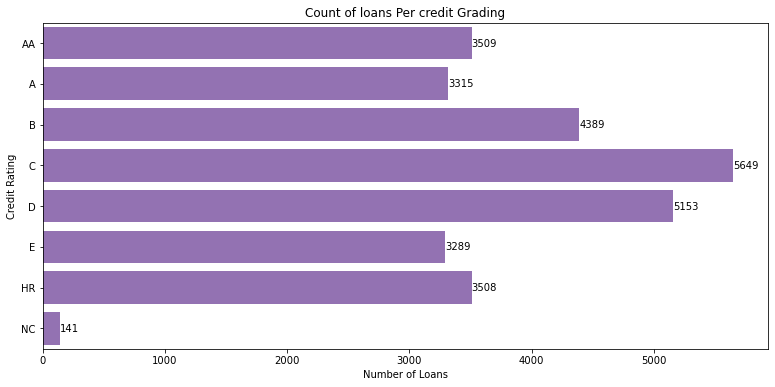

In [833]:
# plot bar chart

plt.figure(figsize = (13,6))

draw_bar('CreditGrade')

plt.xlabel('Number of Loans')
plt.ylabel('Credit Rating')
plt.title('Count of loans Per credit Grading');

Most of the borrowers in this dataset have a C credit rating. The next credit rating with the most borrowers is D with a total of 5,153 people. From the visualization we can also see that the least amount of loans went to borrowers with a NC (No Credit) rating. Only 141 people with No Credit were given loans.  

#### Question #2: What was the most common Employment Status of loan borrowers?

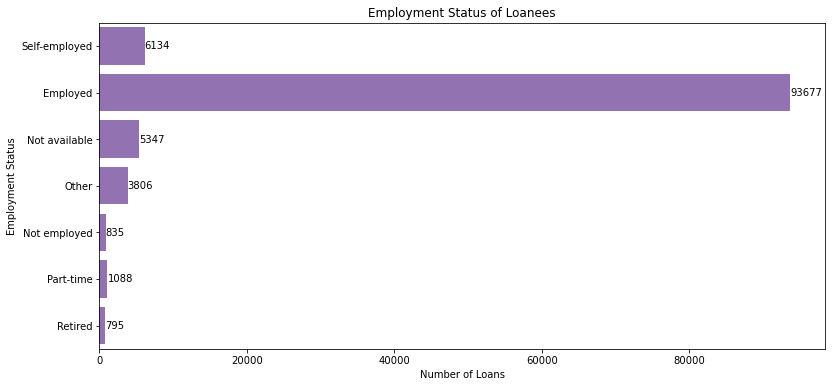

In [834]:
#plot bar chart

plt.figure(figsize = (13,6))
draw_bar('EmploymentStatus')

plt.xlabel('Number of Loans')
plt.ylabel('Employment Status')
plt.title('Employment Status of Loanees');

The most common employment status listed by loan borrowers was "Employed" at 93677. The least common employment status listed was "Retired" with a meagre 795 loans. 

#### Question #3: What is the distribution of interest rates in the datset? 

In [835]:
#Summary stats

loan_clean['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [836]:
#Create bins

bin = np.arange(0, loan_clean['BorrowerRate'].max()+0.01, 0.02)

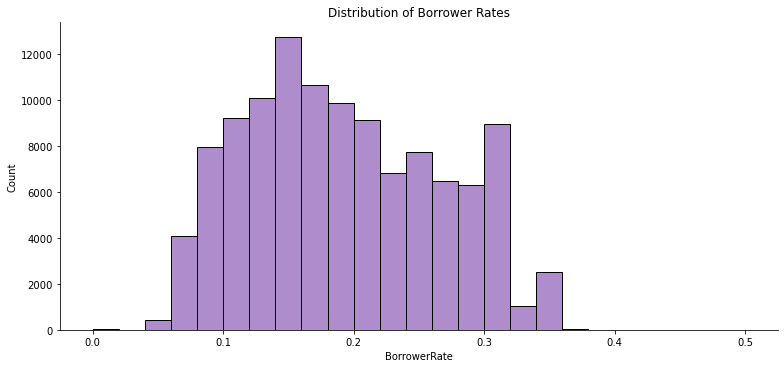

In [837]:
#plot histogram

sb.displot(
    loan_clean['BorrowerRate'], 
    bins=bin, 
    color=sb.color_palette()[4], aspect=2.2
        ).set(title='Distribution of Borrower Rates');

Our histogram is almost bell-shaped with a single peak. Majority of the `BorrowerRates` lie between 0.13 and 0.15 in this unimodal distribution. The number of loans assigned rates higher than 0.15 decreases as you move to the right. However this decrease is not constant because there is a slight flare up once we hit the 0.3 BorrowRate mark. 

#### Question #4: In which income range do the least number of loans lie in?

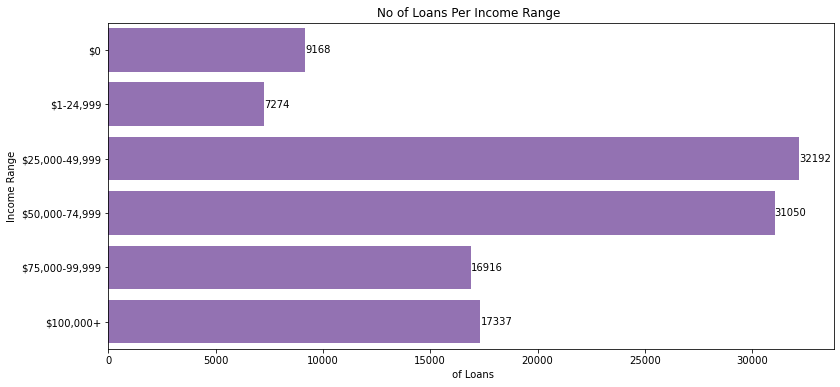

In [838]:
# Plot bar chart

plt.figure(figsize = (13,6))
draw_bar('IncomeRange')

plt.xlabel(' of Loans')
plt.ylabel('Income Range')
plt.title('No of Loans Per Income Range ');

<p>The bar chart visualizing the count of loans in each income range does not potray any discernable pattern. As we can see the count of loans in the "\$0" brackets stood at 9168, but drops to 7274 when we move to the next income range of "\$1 - \$24,999". The next income range of "\$25,000-\$49,999" has the highest number of borrowers with a figure of 32,192. 
 `"\$1-\$24,999"` has the lowest number of borrowers at 7,274. </P>

#### Question #5: What is the distribution of the DebtToIncomeRatio in the dataset?

In [839]:
#investigate summary stats of the DebtToIncomeRation column

loan_clean.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Since the mean of this column is 0.275 , this indicates that most values lie between 0 and 1, which will serve as the limits of our X axis.  

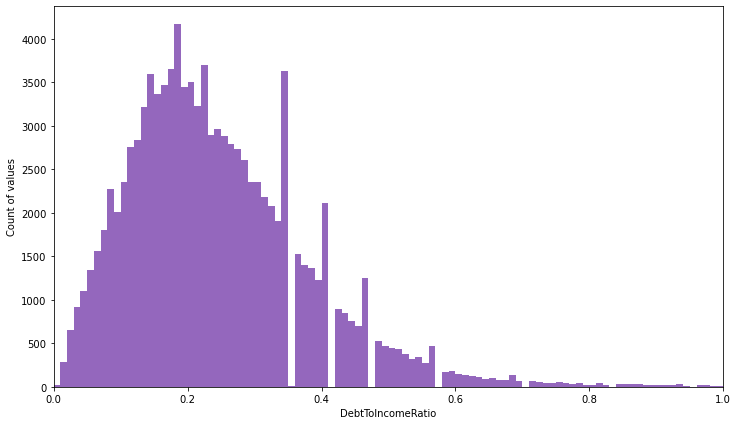

In [840]:
plt.figure(figsize = (12,7))

#Create bins
bins = np.arange(0, loan_clean.DebtToIncomeRatio.max()+0.01, 0.01)

#plot hist
plt.hist(data = loan_clean, x= 'DebtToIncomeRatio', bins=bins, color=sb.color_palette()[4]) 
plt.ylabel('Count of values')
plt.xlabel('DebtToIncomeRatio')
plt.xlim(xmin=0, xmax=1);

The histogram visualizing the distribution of DebtToIncome ratios is skewed to the right.It rises steadily from the left before peaking at approximately 0.18 mark before reducing gradually as you move to the right. This means that most of the income ratios were clustered around the 0.18 mark. We plotted the values between 0 and 1 only because including the extreme unusual points would have distorted the graph and mispresented the findings as shown below: 


<p>Notice how the inclusion of the extreme outlier value greater than 8 distort the visualization  </p>

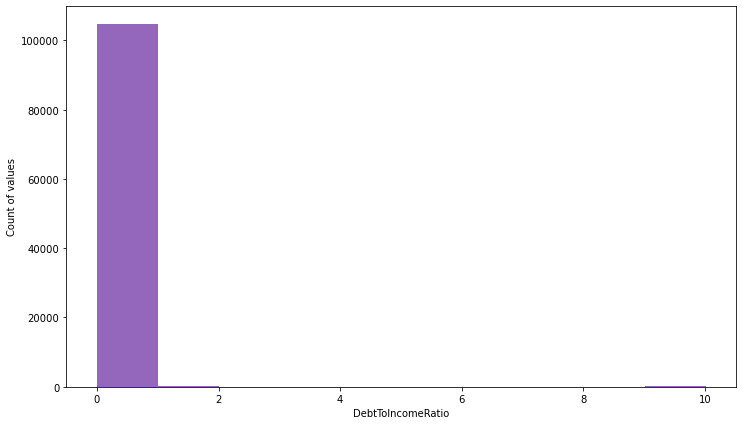

In [841]:
plt.figure(figsize = (12,7))

#plot hist
plt.hist(data = loan_clean, x= 'DebtToIncomeRatio', color=sb.color_palette()[4]) 
plt.ylabel('Count of values')
plt.xlabel('DebtToIncomeRatio');

#### Question #6.  Loan Listing Creation trends across the year

We'll create a new column and populate it with month names, then convert it into a categorial data type so that we can be able to sort based on month name. 

In [842]:
#Create a month column

loan_clean['month'] = pd.to_datetime(loan_clean['ListingCreationDate']).dt.strftime('%b')

In [843]:
#month names

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [844]:
#change datatype to categorical

loan_clean['month'] = pd.Categorical(loan_clean['month'], categories=months, ordered=True)

Let's confirm if the conversion was successful

In [845]:
loan_clean['month'].unique()

['Aug', 'Feb', 'Jan', 'Oct', 'Sep', ..., 'May', 'Jul', 'Nov', 'Jun', 'Mar']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [846]:
loan_clean['ListingKey'].groupby(loan_clean['month']).count()

month
Jan    11214
Feb    10124
Mar     8032
Apr     7661
May     8641
Jun     8672
Jul     9506
Aug     9202
Sep    10074
Oct    10539
Nov     9952
Dec    10320
Name: ListingKey, dtype: int64

Plot a bar chart to visualize the findings

In [847]:
#Slight modification to function to plot against x axis

def vertical_bar(colname):
    output_bar = sb.countplot(x=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

''

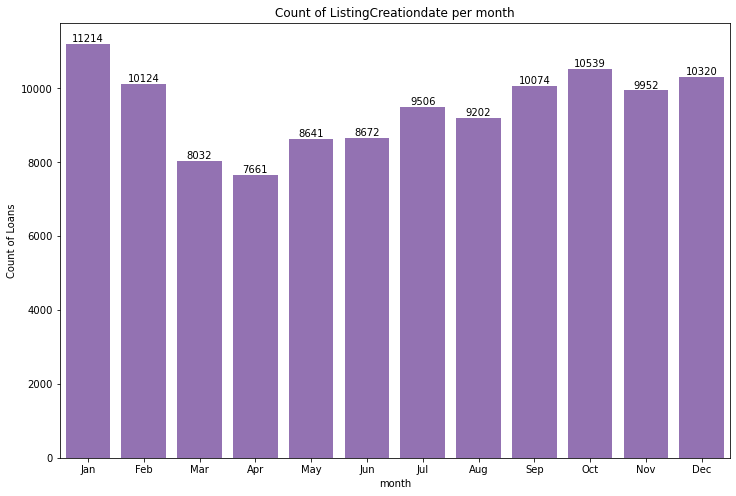

In [848]:
plt.figure(figsize = (12,8))

vertical_bar('month')
plt.ylabel('Count of Loans')
plt.title('Count of ListingCreationdate per month')
;

This chart shows the months loans were created through the year. While most loans were listed in Jan, the least number of loans were listed in April.As we can see from the chart, the number of loans peaked in Jan and reduced over the next 3 months to their lowest count in April. We then have a clear upwards trend for the second quarter upto July before the number of dips slightly before picking another upwards trend.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 The *DebtToIncomeRatio* column had 300 rows with values more than 8. This represented approximately 0.27% of the count of values present in the column. Including these outliers in the cluster plot distorted cluster visualizations by lumping most of the values in a single significantly tall bar between 0 and 1 before spreading out the rest of the value over barely visible bars between 2 and 10 xticks. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Apart from the extreme outliers in the *DebtToIncomeRatio* column that were excluded from plots, there weren't any major unusual distributions in the dataset that needed adjustment. All the cleaning and tidying operations were handled in the cleaning stage where both the CreditGrade and IcomeRange were converted to an ordered categorical datatype. 

## Bivariate Exploration

#### Question #7: How do home ownership rates vary across employment categories?

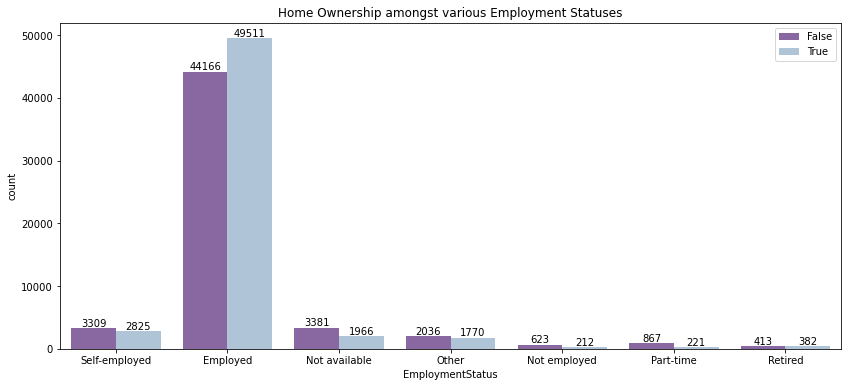

In [849]:
#plot a clustered barchart
plt.figure(figsize = (14,6))


clustered = sb.countplot(data = loan_clean,  x='EmploymentStatus', hue='IsBorrowerHomeowner', palette='BuPu_r')
plt.legend()
plt.title('Home Ownership amongst various Employment Statuses')
for bar in clustered.containers:
        clustered.bar_label(bar)

Home Ownership rates between the Employed Categories and all other categories vary greatly. Home ownership is highest amongst the Employed and lowest among the Retired category. 

#### Question #8: What is relationship between ProsperScore and Income range categories?

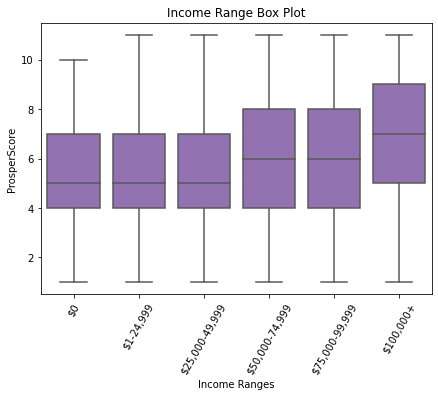

In [850]:
#box plot

plt.figure(figsize=(7,5))
sb.boxplot(data=loan_clean, x='IncomeRange', y='ProsperScore',color=sb.color_palette()[4] )
plt.xlabel('Income Ranges')
plt.ylabel('ProsperScore')
plt.title('Income Range Box Plot')
plt.xticks(rotation=60);

The boxplot visualizes how data is dispersed within each income range category. The highest 3 categories have slightly higher dispersions than the 3 lowest ranked income categories. Incidentally, the three lowest ranked categories appear to share the same minimum, 1st quartile, median and 3rd quartile figures. The 4th and 5th income categories share the same Prosperscore descriptive statistics.

#### Question #9:   What is relationship between ProsperScore and Income range categories?

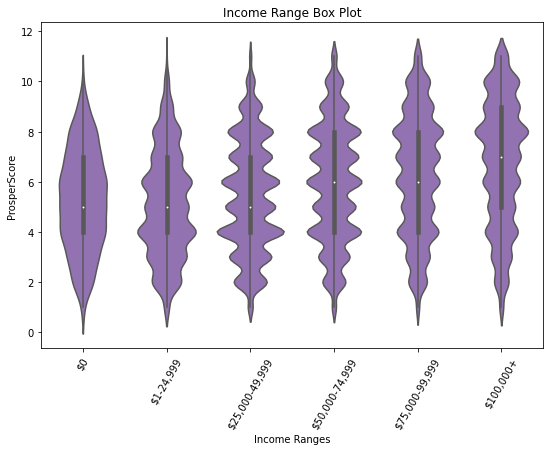

In [851]:
plt.figure(figsize=(9,6))
sb.violinplot(data=loan_clean, x='IncomeRange', y='ProsperScore', color=sb.color_palette()[4])
plt.xlabel('Income Ranges')
plt.ylabel('ProsperScore')
plt.title('Income Range Box Plot')
plt.xticks(rotation=60);

Just like the box plot that was visualized in the previous question, these violin plots show that the 1st three lowest income levels share the same summary statistics. The minimum prosperscore value is 1, the first quartile is 4, the median is 5 and the third quartile is 7. How the density plot that shows the distribution shape of the values is slightly different for the lowest income level where it shows that most of the prosperscore values were likely between 3 and 6.  

#### Question #10: What is the correlation between DebtToIncomeRatio and BorrowerRate variables?

We are going to use the sampled of 1000 to answer this question to avoid overplotting

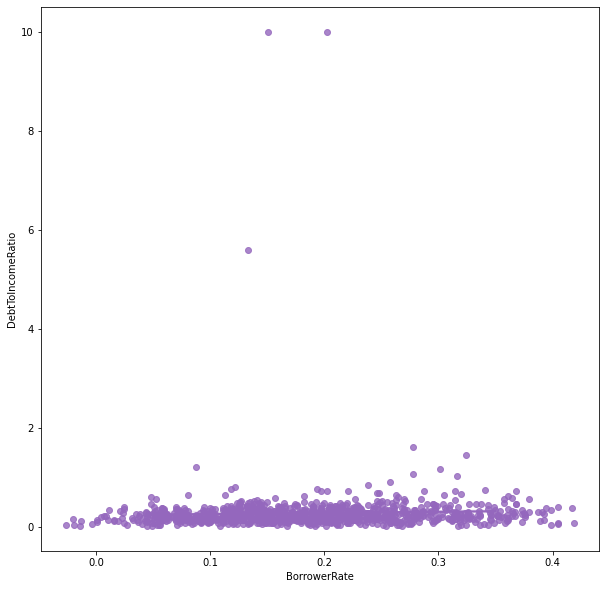

In [852]:
#Limit the Y axis plot

plt.figure(figsize=(10,10))
sb.regplot(data=loan_sampled, x='BorrowerRate', y='DebtToIncomeRatio',
           x_jitter=0.09, color=sb.color_palette()[4]
          
          );

We will have to re-plot the graph because when we look at the Y axis, we can see that the DebtToIncomeRatio has extreme outliers that are distorting the visualization. We can confirm this by executing the .describe method on the column.

In [853]:
#investigate summary stats of the DebtToIncomeRation column

loan_clean['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

We can deduce from the summary statistics that most of our 'DebtToIncomeRatio'data points lie between 0 and 1. Therefore we should filter our loan_sampled dataframe to pick only rows where DebToIncomeRatio is less than 1

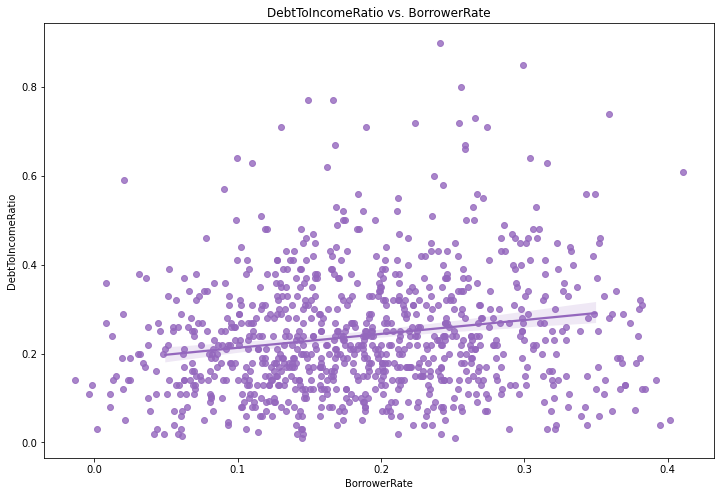

In [854]:
# Limit the Y axis plot to between 0 and 1 where most of the data points lie

plt.figure(figsize=(12,8))
plt.title('DebtToIncomeRatio vs. BorrowerRate')
sb.regplot(data=loan_sampled[loan_sampled.DebtToIncomeRatio <= 1], 
           x='BorrowerRate', y='DebtToIncomeRatio',
           x_jitter=0.07, color=sb.color_palette()[4]
          );

The scatterplot displays a weak but positive relationship between the DebtToIncomeRatio and BorrowerRate variables. As the BorrowerRate increases,  DebtToIncomeRatio tends to increase also. 

#### Question #12: Is there a correlation between LoanOriginalAmount and BorrowerRate?

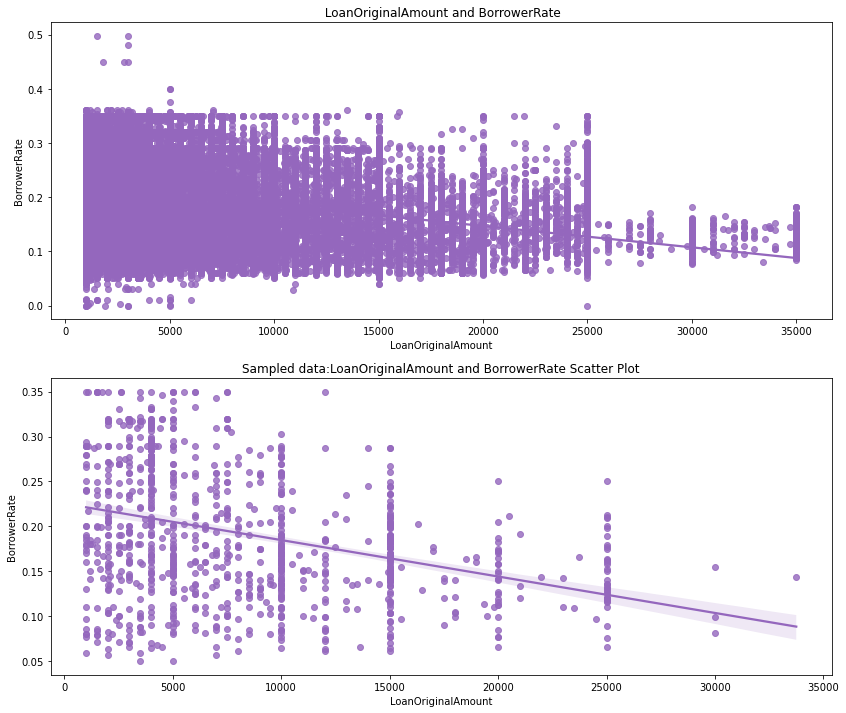

In [855]:
#plot a scatter plot

plt.figure(figsize=(14,12))

#From loan_clean dataset
plt.subplot(2, 1, 1)
plt.title(' LoanOriginalAmount and BorrowerRate')
sb.regplot(data=loan_clean, x='LoanOriginalAmount', y='BorrowerRate',x_jitter=0.004, color=sb.color_palette()[4]);


#From sampled smaller dataset 
plt.subplot(2, 1, 2)
sb.regplot(data=loan_sampled, x='LoanOriginalAmount', y='BorrowerRate',x_jitter=0.008, color=sb.color_palette()[4])
plt.title('Sampled data:LoanOriginalAmount and BorrowerRate Scatter Plot') ;

The first visualization depicting the relationship between is overplotted because it plotted values from 113,000 rows. The second chart plotted from a sample of the dataset shows a negative correlation between the two variables. This means that the bigger the loan the less the BorrowerRate.   

#### Question #13: How are Credit Grades distributed through individual income ranges?

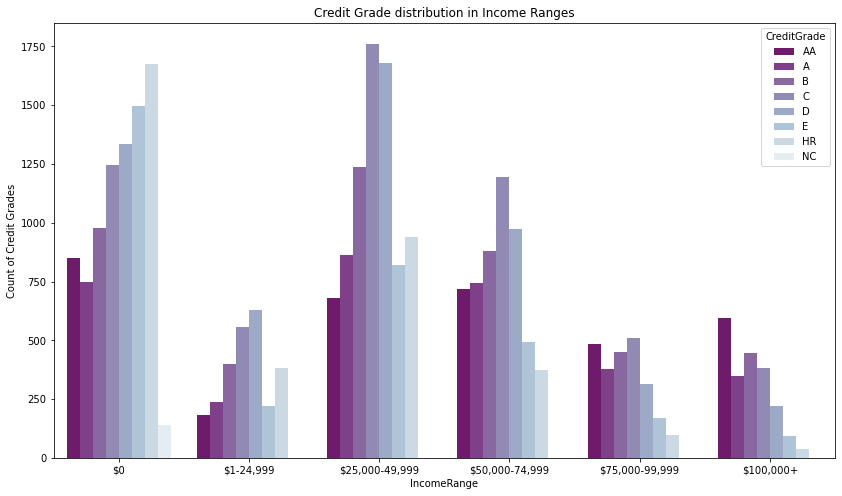

In [856]:
plt.figure(figsize=(14,8))
sb.countplot(data=loan_clean, x='IncomeRange', hue='CreditGrade', palette='BuPu_r')
plt.title('Credit Grade distribution in Income Ranges')
plt.ylabel('Count of Credit Grades');

For the borrowers who listed their income as \$0, the count of people increased as the crediting rating reduced. It peaked at the `HR` before dropping to its lowest count in `NC` (No-Credit) category. This trend is somehow reversed in the two highest income categories where we see that most of borrowers have better Credit Ratings than those with poor ratings. When we examine the highest income group , most of the borrowers are in the AA credit rating. The count drops when we move to the A rating but rises before maintaing a steady drop in the subsequent credit rating categories. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 There was staggering disparity in homeownership rates in the dataset. Borrowers categorized under Employed had the highest home ownership rates that were approximately 13 times higher than the next highest homeownership category. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 When investigating the relationship between DebtToIncomeRatio and BorrowerRate, there was a insignificant but positive relationship between the two variables. This signified that the more debt a borrower had, the more likely their borrowing rates were to be high.

## Multivariate Exploration

We determined that there a negative relationship between the Original Loan amount and Borrowing Rate. The bigger the loan requested , the smaller the rate was. We will examine this relationship further by introducing a third variable.  

#### Question #14: How do Credit Grades influence the relationship between  LoanOriginalAmount and BorrowerRate?

<Figure size 1008x504 with 0 Axes>

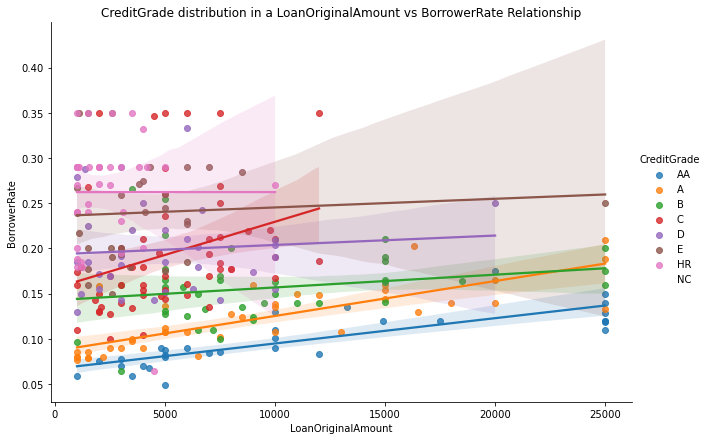

In [857]:
#From sampled smaller dataset 

plt.figure(figsize=(14,7))

f = sb.FacetGrid(data=loan_sampled, hue='CreditGrade', height=6, aspect=1.5)
f.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.004)
plt.title('CreditGrade distribution in a LoanOriginalAmount vs BorrowerRate Relationship')
f.add_legend();

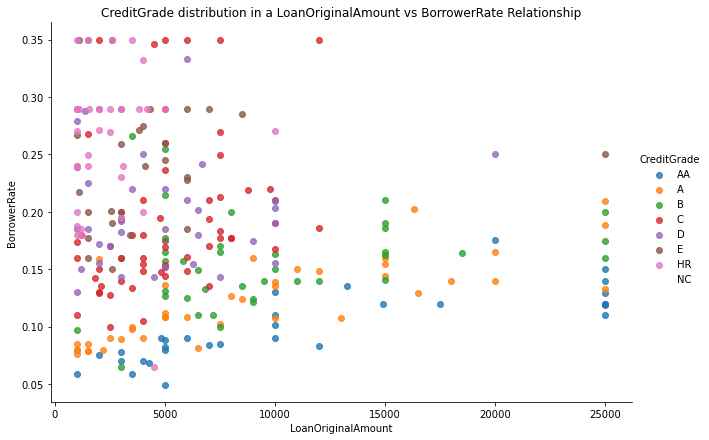

In [858]:
# Re-plot without reg lines

f = sb.FacetGrid(data=loan_sampled, hue='CreditGrade', height=6, aspect=1.5)
f.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate',fit_reg=False, x_jitter=0.008)
plt.title('CreditGrade distribution in a LoanOriginalAmount vs BorrowerRate Relationship')
f.add_legend()
plt.show();

This visualization revealed a rather interesting observation. There was significant positive relationship between the Loanamount and the borrowerRate in the top most rated credit ratings ('AA', 'A', 'B', 'C', 'D'). This means that the borrowing rate increased as the loan amount increased in each credit category.  There was also slightly positive relationship between loanamount and Borrowerate in the last 2 credit ratings ('E', 'HR'), but it was a positive relationship nevertheless. This somehow negates our previous findings where we saw that as the Original Loan Amount increased, the borrowing rate decreased.  

#### Question #15: What's the distribution of home owner statuses in a BorrowerRate vs DebtToIncomeRatio scatter plot?

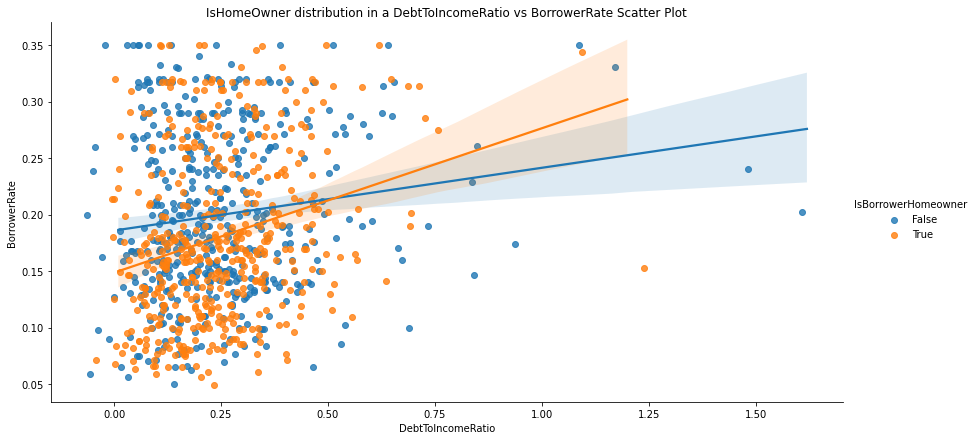

In [859]:
#From sampled smaller dataset 

f = sb.FacetGrid(data=loan_sampled[loan_sampled.DebtToIncomeRatio <= 2], hue='IsBorrowerHomeowner', height=6, aspect=2.0)
f.map(sb.regplot, 'DebtToIncomeRatio', 'BorrowerRate',  fit_reg=True, x_jitter=0.09)
f.add_legend();
plt.title('IsHomeOwner distribution in a DebtToIncomeRatio vs BorrowerRate Scatter Plot') ;

 As the BorrowerRate increases, DebtToIncomeRatio tends to increase also for both home owners and non-homeowners. The relationship was more pronounced in homeowners category which had a bigger correlation coefficient than that of the non-homeowners. This virtually reasonates with our earlier findings where we found that the DebtToIncomeRatio and BorrowerRate variables had a positive relationship.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 Including a third variable ("IsBorrowerHomeowner") strengthened the positive corelation we observed between DebtToIncomeRatio and BorrowerRate. Even though the home owner categories visualized a positive corelation, the homeowner's coefficient was stronger than the non-homeowners. 
### Were there any interesting or surprising interactions between features?

 Plotting a third variable(Credit Ratings) in a Loanamount VS borrowerRate scatter plot revealed that the borrowing rate increased as the LoanAmount increased for each Credit category. However, when the LoanAmount and borrowerRate without the crediting rating variable we get a negative relationship. 



## Conclusions
<p> 
Most of the borrowers in this dataset have a C credit rating. The next credit rating with the most borrowers is D with a total of 5,153 people. From the visualization we can also see that the least amount of loans went to borrowers with a NC (No Credit) rating. Only 141 people with No Credit were given loans.  
</p>
<p>
 The most common employment status listed by loan borrowers was "Employed" at 93677. The least common employment status listed was "Retired" with a meagre 795 loans. Home Ownership rates between the Employed Categories and all other categories vary greatly. Home ownership is highest amongst the Employed and lowest among the Retired category. 
</P>

<p>
From our listCreationDate Barchart, the highest number of loans were listed in Jan while the least number of loans was listed in April. There is a continuous downward trend from Jan that ended in April. And then from April We have a clear upwards trend for the second quarter upto July before the number of dips slightly before picking another upwards trend until the last month. 
</p>


<p>There is a weak but positive relationship between the DebtToIncomeRatio and BorrowerRate variables. As the BorrowerRate increases,  DebtToIncomeRatio tends to increase also. </p>

<p>
There was significant positive relationship between the Loanamount and the borrowerRate in the top most rated credit ratings ('AA', 'A', 'B', 'C', 'D'). This means that the borrowing rate increased as the loan amount increased in each credit category. There was also slightly strong positive relationship between loanamount and Borrowerate in the last 2 credit ratings ('E', 'HR'), but it was a positive relationship nevertheless. This somehow negates our previous findings where we saw when the Original Loan Amount increased, the borrowing rate decreased.</p>
<p>
As the BorrowerRate increases, DebtToIncomeRatio tends to increase also for both home owners and non-homeowners. The relationship was more pronounced in homeowners category which had a bigger correlation coefficient than that of the non-homeowners. This virtually reasonates with our earlier findings where we found that the DebtToIncomeRatio and BorrowerRate variables had a positive relationship.</p>

<p>
For the borrowers who listed their income as $0, the count of people increased as the crediting rating reduced. When we examined the highest income group , most of the borrowers have the best  AA credit rating, while the worst credit rating has the least count of borrowers.</p>